# Evaluación 1 - Introducción a Ciencia de Datos Espaciales

## 1. Merge de las 3 fuentes seleccionadas

Importo la librería Pandas y leo los 3 archivos con la data que han sido subidos al repositorio Github.
  1. Emisiones de CO2 sin LULUCF
       - Unidad: Kilotones
       - Fuente: United Nations Framework Convention on Climate Change       
  2. Precipitation
       - Unidad: Milímetros
       - Fuente: World Metereological Organization
  3. Solar electricity
       - Unidad: millones Kilowatt-hora
       - Fuente: United Nations Statistics Division

In [272]:
import pandas as pd

co2Link='https://github.com/IntroSpatialDataScience/ClimateChangeData/raw/main/data/CO2_emission.csv'
precipitationLink = 'https://github.com/IntroSpatialDataScience/ClimateChangeData/raw/main/data/precipitation_mean.csv'
solarElectricityLink = 'https://github.com/IntroSpatialDataScience/ClimateChangeData/raw/main/data/solar_electricity.csv'
co2=pd.read_csv(co2Link)
precipitation=pd.read_csv(precipitationLink)
solar = pd.read_csv(solarElectricityLink)

Realizo una copia de cada dataframe para trabajar sin modificar el archivo original

In [273]:
co2_new=co2.copy()
precipitation_new=precipitation.copy()
solar_new=solar.copy()

Cambio los nombres de las columnas referentes al territorio o país de cada DF para facilitar el merge entre ellos.

In [274]:
co2_new.rename(columns={'Country or Area':'Country'}, inplace=True)
precipitation_new.rename(columns={'Country or Territory':'Country'}, inplace=True)
solar_new.rename(columns={'Country or Area':'Country'}, inplace=True)

Para encontrar coincidencias entre los diferentes DF, cambio el formato de los strings de la columna 'Country' a 'title'.

In [275]:
precipitation_new['Country']=precipitation_new.Country.str.title()

In [276]:
precipitation_new.head()

,Country,Station Name,Period,Statistic Description,Unit,Jan,Jan Footnotes,Feb,Feb Footnotes,Mar,...,Oct,Oct Footnotes,Nov,Nov Footnotes,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes
0,"Afghanistan, Islamic State Of",Faiz abad,1961-1983,Mean Monthly Value,mm,49.4,NaN,65.0,NaN,91.9,...,23.4,NaN,29.7,NaN,34.1,NaN,40.4,NaN,484.9,NaN
1,"Afghanistan, Islamic State Of",Sheberghan,1959-1983,Mean Monthly Value,mm,42.3,NaN,44.3,NaN,56.4,...,6.6,NaN,13.6,NaN,29.8,NaN,19.2,NaN,230.5,NaN
2,"Afghanistan, Islamic State Of",Mazar-i-Sharif,1958-1983,Mean Monthly Value,mm,28.9,NaN,34.8,NaN,43.8,...,3.9,NaN,13.5,NaN,21.7,NaN,15.5,NaN,186.4,NaN
3,"Afghanistan, Islamic State Of",Kunduz,1968-1983,Mean Monthly Value,mm,44.0,NaN,56.5,NaN,76.7,...,7.3,NaN,23.7,NaN,28.4,NaN,26.8,NaN,322.6,NaN
4,"Afghanistan, Islamic State Of",Maimana,1964-1983,Mean Monthly Value,mm,49.9,NaN,60.5,NaN,82.2,...,9.6,NaN,20.9,NaN,44.7,NaN,29.6,NaN,355.6,NaN


Ahora, separo las palabras separadas por coma en diferentes columnas. 

In [277]:
precipitation_new['Country']=precipitation_new.Country.str.split(',',expand=True)[0]

In [278]:
precipitation_new.head()

,Country,Station Name,Period,Statistic Description,Unit,Jan,Jan Footnotes,Feb,Feb Footnotes,Mar,...,Oct,Oct Footnotes,Nov,Nov Footnotes,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes
0,Afghanistan,Faiz abad,1961-1983,Mean Monthly Value,mm,49.4,NaN,65.0,NaN,91.9,...,23.4,NaN,29.7,NaN,34.1,NaN,40.4,NaN,484.9,NaN
1,Afghanistan,Sheberghan,1959-1983,Mean Monthly Value,mm,42.3,NaN,44.3,NaN,56.4,...,6.6,NaN,13.6,NaN,29.8,NaN,19.2,NaN,230.5,NaN
2,Afghanistan,Mazar-i-Sharif,1958-1983,Mean Monthly Value,mm,28.9,NaN,34.8,NaN,43.8,...,3.9,NaN,13.5,NaN,21.7,NaN,15.5,NaN,186.4,NaN
3,Afghanistan,Kunduz,1968-1983,Mean Monthly Value,mm,44.0,NaN,56.5,NaN,76.7,...,7.3,NaN,23.7,NaN,28.4,NaN,26.8,NaN,322.6,NaN
4,Afghanistan,Maimana,1964-1983,Mean Monthly Value,mm,49.9,NaN,60.5,NaN,82.2,...,9.6,NaN,20.9,NaN,44.7,NaN,29.6,NaN,355.6,NaN


El número de filas y columnas de cada dataframe es:

In [279]:
co2_new.shape,precipitation_new.shape,solar_new.shape

((129, 3), (4263, 33), (244, 6))

In [280]:
co2_new.columns,precipitation_new.columns,solar_new.columns

(Index(['Country', 'Year', 'Value'], dtype='object'),
 Index(['Country', 'Station Name', 'Period', 'Statistic Description', 'Unit',
        'Jan', 'Jan Footnotes', 'Feb', 'Feb Footnotes', 'Mar', 'Mar Footnotes',
        'Apr', 'Apr Footnotes', 'May', 'May Footnotes', 'Jun', 'Jun Footnotes',
        'Jul', 'Jul Footnotes', 'Aug', 'Aug Footnotes', 'Sep', 'Sep Footnotes',
        'Oct', 'Oct Footnotes', 'Nov', 'Nov Footnotes', 'Dec', 'Dec Footnotes',
        'Annual', 'Annual Footnotes', 'Annual NCDC Computed Value',
        'Annual NCDC Computed Value Footnotes'],
       dtype='object'),
 Index(['Country', 'Commodity - Transaction', 'Year', 'Unit', 'Quantity',
        'Quantity Footnotes'],
       dtype='object'))

Merge entre dataframe de CO2 y SolarEnergy manteniendo lo que es común en ambas columnas

In [281]:
co2_solar = co2_new.merge(solar_new,how='inner',left_on='Country',right_on='Country')
co2_solar

,Country,Year_x,Value,Commodity - Transaction,Year_y,Unit,Quantity,Quantity Footnotes
0,Australia,2020,400333.466600,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN
1,Australia,2020,400333.466600,Electricity - total solar production,2000.0,"Kilowatt-hours, million",38.000,NaN
2,Australia,2000,349635.486902,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN
3,Australia,2000,349635.486902,Electricity - total solar production,2000.0,"Kilowatt-hours, million",38.000,NaN
4,Australia,1990,278154.156296,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN
...,...,...,...,...,...,...,...,...
175,United Kingdom,2020,326920.692502,Electricity - total solar production,2000.0,"Kilowatt-hours, million",1.000,NaN
176,United Kingdom,2000,569744.209114,Electricity - total solar production,2020.0,"Kilowatt-hours, million",13157.994,NaN
177,United Kingdom,2000,569744.209114,Electricity - total solar production,2000.0,"Kilowatt-hours, million",1.000,NaN
178,United Kingdom,1990,602652.078446,Electricity - total solar production,2020.0,"Kilowatt-hours, million",13157.994,NaN


Merge entre el resultado anterior y Precipitacion manteniendo lo que es común en ambas columnas

In [282]:
co2_solar_prep = co2_solar.merge(precipitation_new,how='inner',left_on='Country',right_on='Country')
co2_solar_prep

,Country,Year_x,Value,Commodity - Transaction,Year_y,Unit_x,Quantity,Quantity Footnotes,Station Name,Period,...,Oct,Oct Footnotes,Nov,Nov Footnotes,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes
0,Australia,2020,400333.466600,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ALBANY (ALBANY TOWN),1961-1965,...,96.0,NaN,37.9,NaN,23.0,NaN,-9999.9,1.0,1012.3,NaN
1,Australia,2020,400333.466600,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ESPERANCE (ESPERANCE POST OFFICE),1961-1969,...,51.3,NaN,19.3,NaN,17.9,NaN,-9999.9,1.0,698.8,NaN
2,Australia,2020,400333.466600,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,TENNANT CRK POST OFFICE WAS 014050,1961-1970,...,14.3,NaN,11.8,NaN,40.6,NaN,-9999.9,1.0,321.3,NaN
3,Australia,2020,400333.466600,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,LONGREACH POST OFFICE,1961-1973,...,19.6,NaN,22.3,NaN,84.1,NaN,-9999.9,1.0,433.7,NaN
4,Australia,2020,400333.466600,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ESSENDON AIRPORT AMO,1961-1972,...,51.5,NaN,42.7,NaN,57.5,NaN,-9999.9,1.0,594.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7768,Ukraine,1990,705830.043363,Electricity - total solar production,2020.0,"Kilowatt-hours, million",5969.400,NaN,DNEPROPETROVSK,1961-1990,...,32.0,NaN,42.0,NaN,52.0,NaN,513.0,NaN,513.0,NaN
7769,Ukraine,1990,705830.043363,Electricity - total solar production,2020.0,"Kilowatt-hours, million",5969.400,NaN,DONECK,1961-1990,...,27.0,NaN,42.0,NaN,52.0,NaN,515.0,NaN,515.0,NaN
7770,Ukraine,1990,705830.043363,Electricity - total solar production,2020.0,"Kilowatt-hours, million",5969.400,NaN,LUGANSK,1961-1990,...,27.0,NaN,42.0,NaN,43.0,NaN,473.0,NaN,473.0,NaN
7771,Ukraine,1990,705830.043363,Electricity - total solar production,2020.0,"Kilowatt-hours, million",5969.400,NaN,HAPOROZ'E,1961-1990,...,27.0,NaN,43.0,NaN,52.0,NaN,510.0,NaN,510.0,NaN


A todo este resultado le asigno un nuevo nombre y es el que será modificado.

In [283]:
DF = co2_solar_prep.copy()
DF.head()

,Country,Year_x,Value,Commodity - Transaction,Year_y,Unit_x,Quantity,Quantity Footnotes,Station Name,Period,...,Oct,Oct Footnotes,Nov,Nov Footnotes,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes
0,Australia,2020,400333.4666,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ALBANY (ALBANY TOWN),1961-1965,...,96.0,NaN,37.9,NaN,23.0,NaN,-9999.9,1.0,1012.3,NaN
1,Australia,2020,400333.4666,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ESPERANCE (ESPERANCE POST OFFICE),1961-1969,...,51.3,NaN,19.3,NaN,17.9,NaN,-9999.9,1.0,698.8,NaN
2,Australia,2020,400333.4666,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,TENNANT CRK POST OFFICE WAS 014050,1961-1970,...,14.3,NaN,11.8,NaN,40.6,NaN,-9999.9,1.0,321.3,NaN
3,Australia,2020,400333.4666,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,LONGREACH POST OFFICE,1961-1973,...,19.6,NaN,22.3,NaN,84.1,NaN,-9999.9,1.0,433.7,NaN
4,Australia,2020,400333.4666,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ESSENDON AIRPORT AMO,1961-1972,...,51.5,NaN,42.7,NaN,57.5,NaN,-9999.9,1.0,594.9,NaN


## 2. Merge con el archivo adjunto

El archivo adjuntado en Paideia PUCP fue subido al repositorio de Github

In [284]:
country_isosLink = 'https://github.com/IntroSpatialDataScience/ClimateChangeData/raw/main/data/country_isos.xlsx'
country_Isos = pd.read_excel(country_isosLink)

In [285]:
country_Isos

,Country,Officialstatename,InternetccTLD,iso2,iso3
0,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG
1,ALBANIA,The Republic of Albania,.al,AL,ALB
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA
3,ANGOLA,The Republic of Angola,.ao,AO,AGO
4,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG
...,...,...,...,...,...
166,UZBEKISTAN,The Republic of Uzbekistan,.uz,UZ,UZB
167,VIET NAM,The Socialist Republic of Viet Nam,.vn,VN,VNM
168,YEMEN,The Republic of Yemen,.ye,YE,YEM
169,ZAMBIA,The Republic of Zambia,.zm,ZM,ZMB


Cambio a 'title' el tipo de cadena de la columna 'Country' para realizar el merge con el anterior dataframe.

In [286]:
country_Isos.Country = country_Isos.Country.str.title()
country_Isos

,Country,Officialstatename,InternetccTLD,iso2,iso3
0,Afghanistan,The Islamic Republic of Afghanistan,.af,AF,AFG
1,Albania,The Republic of Albania,.al,AL,ALB
2,Algeria,The People's Democratic Republic of Algeria,.dz,DZ,DZA
3,Angola,The Republic of Angola,.ao,AO,AGO
4,Antigua And Barbuda,Antigua and Barbuda,.ag,AG,ATG
...,...,...,...,...,...
166,Uzbekistan,The Republic of Uzbekistan,.uz,UZ,UZB
167,Viet Nam,The Socialist Republic of Viet Nam,.vn,VN,VNM
168,Yemen,The Republic of Yemen,.ye,YE,YEM
169,Zambia,The Republic of Zambia,.zm,ZM,ZMB


Realizo el merge entre mi Dataframe y el nuevo DF manteniendo lo común entre ambos.

In [287]:
DF = DF.merge(country_Isos,how='inner',left_on='Country',right_on='Country')
DF

,Country,Year_x,Value,Commodity - Transaction,Year_y,Unit_x,Quantity,Quantity Footnotes,Station Name,Period,...,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,2020,400333.466600,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ALBANY (ALBANY TOWN),1961-1965,...,23.0,NaN,-9999.9,1.0,1012.3,NaN,The Commonwealth of Australia,.au,AU,AUS
1,Australia,2020,400333.466600,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ESPERANCE (ESPERANCE POST OFFICE),1961-1969,...,17.9,NaN,-9999.9,1.0,698.8,NaN,The Commonwealth of Australia,.au,AU,AUS
2,Australia,2020,400333.466600,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,TENNANT CRK POST OFFICE WAS 014050,1961-1970,...,40.6,NaN,-9999.9,1.0,321.3,NaN,The Commonwealth of Australia,.au,AU,AUS
3,Australia,2020,400333.466600,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,LONGREACH POST OFFICE,1961-1973,...,84.1,NaN,-9999.9,1.0,433.7,NaN,The Commonwealth of Australia,.au,AU,AUS
4,Australia,2020,400333.466600,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ESSENDON AIRPORT AMO,1961-1972,...,57.5,NaN,-9999.9,1.0,594.9,NaN,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,Ukraine,1990,705830.043363,Electricity - total solar production,2020.0,"Kilowatt-hours, million",5969.400,NaN,DNEPROPETROVSK,1961-1990,...,52.0,NaN,513.0,NaN,513.0,NaN,Ukraine,.ua,UA,UKR
7739,Ukraine,1990,705830.043363,Electricity - total solar production,2020.0,"Kilowatt-hours, million",5969.400,NaN,DONECK,1961-1990,...,52.0,NaN,515.0,NaN,515.0,NaN,Ukraine,.ua,UA,UKR
7740,Ukraine,1990,705830.043363,Electricity - total solar production,2020.0,"Kilowatt-hours, million",5969.400,NaN,LUGANSK,1961-1990,...,43.0,NaN,473.0,NaN,473.0,NaN,Ukraine,.ua,UA,UKR
7741,Ukraine,1990,705830.043363,Electricity - total solar production,2020.0,"Kilowatt-hours, million",5969.400,NaN,HAPOROZ'E,1961-1990,...,52.0,NaN,510.0,NaN,510.0,NaN,Ukraine,.ua,UA,UKR


## 3. Pre-procesamiento del nuevo DataFrame

Mantengo solo las columnas de mi interés

#### Cleaning my DF

In [288]:
DF = DF[['Country','Year_x','Value','Quantity','Station Name','Annual NCDC Computed Value','Officialstatename','InternetccTLD','iso2','iso3']]
DF

,Country,Year_x,Value,Quantity,Station Name,Annual NCDC Computed Value,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,2020,400333.466600,21033.194,ALBANY (ALBANY TOWN),1012.3,The Commonwealth of Australia,.au,AU,AUS
1,Australia,2020,400333.466600,21033.194,ESPERANCE (ESPERANCE POST OFFICE),698.8,The Commonwealth of Australia,.au,AU,AUS
2,Australia,2020,400333.466600,21033.194,TENNANT CRK POST OFFICE WAS 014050,321.3,The Commonwealth of Australia,.au,AU,AUS
3,Australia,2020,400333.466600,21033.194,LONGREACH POST OFFICE,433.7,The Commonwealth of Australia,.au,AU,AUS
4,Australia,2020,400333.466600,21033.194,ESSENDON AIRPORT AMO,594.9,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...,...
7738,Ukraine,1990,705830.043363,5969.400,DNEPROPETROVSK,513.0,Ukraine,.ua,UA,UKR
7739,Ukraine,1990,705830.043363,5969.400,DONECK,515.0,Ukraine,.ua,UA,UKR
7740,Ukraine,1990,705830.043363,5969.400,LUGANSK,473.0,Ukraine,.ua,UA,UKR
7741,Ukraine,1990,705830.043363,5969.400,HAPOROZ'E,510.0,Ukraine,.ua,UA,UKR


In [289]:
pd.options.mode.chained_assignment = None #desactivar mensaje de emergencia

In [290]:
DF.rename(columns={'Value':'CO2_anual','Quantity':'solar_energy_anual','Annual NCDC Computed Value':'precipitation_anual','Year_x':'Year'}, inplace=True)

In [291]:
DF

,Country,Year,CO2_anual,solar_energy_anual,Station Name,precipitation_anual,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,2020,400333.466600,21033.194,ALBANY (ALBANY TOWN),1012.3,The Commonwealth of Australia,.au,AU,AUS
1,Australia,2020,400333.466600,21033.194,ESPERANCE (ESPERANCE POST OFFICE),698.8,The Commonwealth of Australia,.au,AU,AUS
2,Australia,2020,400333.466600,21033.194,TENNANT CRK POST OFFICE WAS 014050,321.3,The Commonwealth of Australia,.au,AU,AUS
3,Australia,2020,400333.466600,21033.194,LONGREACH POST OFFICE,433.7,The Commonwealth of Australia,.au,AU,AUS
4,Australia,2020,400333.466600,21033.194,ESSENDON AIRPORT AMO,594.9,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...,...
7738,Ukraine,1990,705830.043363,5969.400,DNEPROPETROVSK,513.0,Ukraine,.ua,UA,UKR
7739,Ukraine,1990,705830.043363,5969.400,DONECK,515.0,Ukraine,.ua,UA,UKR
7740,Ukraine,1990,705830.043363,5969.400,LUGANSK,473.0,Ukraine,.ua,UA,UKR
7741,Ukraine,1990,705830.043363,5969.400,HAPOROZ'E,510.0,Ukraine,.ua,UA,UKR


### 3.1 Pre-procesamiento: datos de precipitación

#### Transformation: Aggregation

Creo un nuevo DF con el promedio de precipitacion anual en todo el país

In [292]:
prep_mean = DF.groupby('Country')[['precipitation_anual']].agg('mean')
prep_mean

,precipitation_anual
Country,
Australia,764.802985
Austria,1105.285714
Belarus,622.833333
Belgium,821.200000
Bulgaria,528.714286
Canada,-44.797984
Croatia,853.550000
Cyprus,320.000000
Denmark,727.277778


#### Cleaning
Elimino las siguientes columnas para luego realizar un merge con prep_mean

In [293]:
DF.drop(columns=['Station Name','precipitation_anual'],inplace=True)

#### Integration
Realizo un merge entre mi DF y prep_mean. Mantengo los elemento en común de la columna Country

In [294]:
DF = prep_mean.merge(DF,how='inner',left_on='Country',right_on='Country')
DF

,Country,precipitation_anual,Year,CO2_anual,solar_energy_anual,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,764.802985,2020,400333.466600,21033.194,The Commonwealth of Australia,.au,AU,AUS
1,Australia,764.802985,2020,400333.466600,21033.194,The Commonwealth of Australia,.au,AU,AUS
2,Australia,764.802985,2020,400333.466600,21033.194,The Commonwealth of Australia,.au,AU,AUS
3,Australia,764.802985,2020,400333.466600,21033.194,The Commonwealth of Australia,.au,AU,AUS
4,Australia,764.802985,2020,400333.466600,21033.194,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...
7738,Ukraine,568.000000,1990,705830.043363,5969.400,Ukraine,.ua,UA,UKR
7739,Ukraine,568.000000,1990,705830.043363,5969.400,Ukraine,.ua,UA,UKR
7740,Ukraine,568.000000,1990,705830.043363,5969.400,Ukraine,.ua,UA,UKR
7741,Ukraine,568.000000,1990,705830.043363,5969.400,Ukraine,.ua,UA,UKR


#### Cleaning

In [295]:
DF = DF.drop_duplicates()
DF

,Country,precipitation_anual,Year,CO2_anual,solar_energy_anual,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,764.802985,2020,400333.466600,21033.194,The Commonwealth of Australia,.au,AU,AUS
67,Australia,764.802985,2020,400333.466600,38.000,The Commonwealth of Australia,.au,AU,AUS
134,Australia,764.802985,2000,349635.486902,21033.194,The Commonwealth of Australia,.au,AU,AUS
201,Australia,764.802985,2000,349635.486902,38.000,The Commonwealth of Australia,.au,AU,AUS
268,Australia,764.802985,1990,278154.156296,21033.194,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...
7594,Switzerland,1628.000000,1990,44159.881987,11.000,The Swiss Confederation,.ch,CH,CHE
7598,Switzerland,1628.000000,1990,44159.881987,1.000,The Swiss Confederation,.ch,CH,CHE
7602,Ukraine,568.000000,2020,206941.158967,5969.400,Ukraine,.ua,UA,UKR
7649,Ukraine,568.000000,2000,285321.939446,5969.400,Ukraine,.ua,UA,UKR


### 3.2 Preprocesamiento: datos de energía solar

#### Transformation: Aggregation

In [296]:
df_solar = DF.groupby(['Country','Year'])[['solar_energy_anual']].agg('sum')
# Quito el formato 'index' a las columnas Country y Year
df_solar.reset_index(inplace=True)
df_solar

,Country,Year,solar_energy_anual
0,Australia,1990,21071.194
1,Australia,2000,21071.194
2,Australia,2020,21071.194
3,Austria,1990,2045.934
4,Austria,2000,2045.934
...,...,...,...
94,Switzerland,2000,2610.659
95,Switzerland,2020,2610.659
96,Ukraine,1990,5969.400
97,Ukraine,2000,5969.400


#### Cleaning
Elimino los duplicados guiandome de la columna solar_energy_anual

In [297]:
df_solar.drop_duplicates(subset='solar_energy_anual',inplace=True)

In [298]:
df_solar.drop(columns='Year',inplace=True)
df_solar

,Country,solar_energy_anual
0,Australia,21071.194
3,Austria,2045.934
6,Belarus,176.000
9,Belgium,5105.400
12,Bulgaria,1480.856
15,Canada,4862.000
18,Croatia,95.500
21,Cyprus,295.608
24,Denmark,1181.532
27,Estonia,122.540


In [299]:
#Elimino la columna solar_energy_anual de mi DF para realizar un merge con df_solar
DF = DF.drop(columns='solar_energy_anual')
DF = df_solar.merge(DF,how='inner',left_on='Country',right_on='Country')
DF

,Country,solar_energy_anual,precipitation_anual,Year,CO2_anual,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,21071.194,764.802985,2020,400333.466600,The Commonwealth of Australia,.au,AU,AUS
1,Australia,21071.194,764.802985,2020,400333.466600,The Commonwealth of Australia,.au,AU,AUS
2,Australia,21071.194,764.802985,2000,349635.486902,The Commonwealth of Australia,.au,AU,AUS
3,Australia,21071.194,764.802985,2000,349635.486902,The Commonwealth of Australia,.au,AU,AUS
4,Australia,21071.194,764.802985,1990,278154.156296,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...
145,Switzerland,2610.659,1628.000000,1990,44159.881987,The Swiss Confederation,.ch,CH,CHE
146,Switzerland,2610.659,1628.000000,1990,44159.881987,The Swiss Confederation,.ch,CH,CHE
147,Ukraine,5969.400,568.000000,2020,206941.158967,Ukraine,.ua,UA,UKR
148,Ukraine,5969.400,568.000000,2000,285321.939446,Ukraine,.ua,UA,UKR


In [300]:
DF.drop_duplicates(inplace=True)
DF

,Country,solar_energy_anual,precipitation_anual,Year,CO2_anual,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,21071.194,764.802985,2020,400333.466600,The Commonwealth of Australia,.au,AU,AUS
2,Australia,21071.194,764.802985,2000,349635.486902,The Commonwealth of Australia,.au,AU,AUS
4,Australia,21071.194,764.802985,1990,278154.156296,The Commonwealth of Australia,.au,AU,AUS
6,Austria,2045.934,1105.285714,2020,62037.446764,The Republic of Austria,.at,AT,AUT
8,Austria,2045.934,1105.285714,2000,66149.779714,The Republic of Austria,.at,AT,AUT
...,...,...,...,...,...,...,...,...,...
141,Switzerland,2610.659,1628.000000,2000,43622.369321,The Swiss Confederation,.ch,CH,CHE
144,Switzerland,2610.659,1628.000000,1990,44159.881987,The Swiss Confederation,.ch,CH,CHE
147,Ukraine,5969.400,568.000000,2020,206941.158967,Ukraine,.ua,UA,UKR
148,Ukraine,5969.400,568.000000,2000,285321.939446,Ukraine,.ua,UA,UKR


### 3.3 Pre-procesamiento: emisión de CO2

Creo un nuevo dataframe con las columnas 'Year' y 'CO2_anual':

In [301]:
df_co2= DF.loc[:,['Year','CO2_anual']]
df_co2

,Year,CO2_anual
0,2020,400333.466600
2,2000,349635.486902
4,1990,278154.156296
6,2020,62037.446764
8,2000,66149.779714
...,...,...
141,2000,43622.369321
144,1990,44159.881987
147,2020,206941.158967
148,2000,285321.939446


#### ----- Borrador -----

In [302]:
prueba = df_co2.iloc[0:3]
prueba

,Year,CO2_anual
0,2020,400333.466600
2,2000,349635.486902
4,1990,278154.156296


In [303]:
prueba.set_index(['Year'],inplace=True)
prueba=prueba.T
prueba

Year,2020,2000,1990
CO2_anual,400333.4666,349635.486902,278154.156296


In [304]:
prueba.reset_index(inplace=True)
prueba

Year,index,2020,2000,1990
0,CO2_anual,400333.4666,349635.486902,278154.156296


In [305]:
prueba.iloc[0,0] = DF.iloc[0,0]
prueba

Year,index,2020,2000,1990
0,Australia,400333.4666,349635.486902,278154.156296


#### ----- Final de borrador -----

#### Integration: Appending

In [306]:
# creo un dataframe vacio
df = pd.DataFrame()
# itero por cada pais (divido entre 3 porque se repiten 3 veces)
for i in range(int(len(DF)/3)):
    #selecciono grupos de 3 filas
    dfi = df_co2.iloc[3*i:3*i+3]
    
    #Convierto en indice toda la columna 'Year'
    dfi.set_index(['Year'],inplace=True)
    
    #Realizo la transpuesta del df
    dfi=dfi.T
    
    #Reseteo los índices
    dfi.reset_index(inplace=True)
    
    #Reemplazo el valor de 'index' por el territorio correspondiente
    dfi.iloc[0,0] = DF.iloc[3*i,0]
    
    #Concateno el dataframe anterior con el actual
    df = pd.concat([df, dfi], axis=0)
df

Year,index,2020,2000,1990
0,Australia,4.003335e+05,3.496355e+05,2.781542e+05
0,Austria,6.203745e+04,6.614978e+04,6.214525e+04
0,Belarus,5.859204e+04,5.490598e+04,1.083451e+05
0,Belgium,9.036801e+04,1.267195e+05,1.202926e+05
0,Bulgaria,3.696711e+04,4.546433e+04,7.669920e+04
0,Canada,5.348638e+05,5.666904e+05,4.582183e+05
0,Croatia,1.687053e+04,1.966249e+04,2.297979e+04
0,Cyprus,7.269578e+03,7.122416e+03,4.653217e+03
0,Denmark,2.994838e+04,5.564103e+04,5.487931e+04
0,Estonia,9.343010e+03,1.550038e+04,3.692221e+04


#### Cleaning
Elimino las columnas 'Year' y CO2_anual para realizar el merge

In [307]:
DF.drop(columns=['Year','CO2_anual'],inplace=True)
DF

,Country,solar_energy_anual,precipitation_anual,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS
2,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS
4,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS
6,Austria,2045.934,1105.285714,The Republic of Austria,.at,AT,AUT
8,Austria,2045.934,1105.285714,The Republic of Austria,.at,AT,AUT
...,...,...,...,...,...,...,...
141,Switzerland,2610.659,1628.000000,The Swiss Confederation,.ch,CH,CHE
144,Switzerland,2610.659,1628.000000,The Swiss Confederation,.ch,CH,CHE
147,Ukraine,5969.400,568.000000,Ukraine,.ua,UA,UKR
148,Ukraine,5969.400,568.000000,Ukraine,.ua,UA,UKR


#### Integration: Merging

In [308]:
DF = DF.merge(df,how='inner',left_on='Country',right_on='index')
DF = DF.drop(columns=['index'])
DF

,Country,solar_energy_anual,precipitation_anual,Officialstatename,InternetccTLD,iso2,iso3,2020,2000,1990
0,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS,400333.466600,349635.486902,278154.156296
1,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS,400333.466600,349635.486902,278154.156296
2,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS,400333.466600,349635.486902,278154.156296
3,Austria,2045.934,1105.285714,The Republic of Austria,.at,AT,AUT,62037.446764,66149.779714,62145.248288
4,Austria,2045.934,1105.285714,The Republic of Austria,.at,AT,AUT,62037.446764,66149.779714,62145.248288
...,...,...,...,...,...,...,...,...,...,...
94,Switzerland,2610.659,1628.000000,The Swiss Confederation,.ch,CH,CHE,34240.966950,43622.369321,44159.881987
95,Switzerland,2610.659,1628.000000,The Swiss Confederation,.ch,CH,CHE,34240.966950,43622.369321,44159.881987
96,Ukraine,5969.400,568.000000,Ukraine,.ua,UA,UKR,206941.158967,285321.939446,705830.043363
97,Ukraine,5969.400,568.000000,Ukraine,.ua,UA,UKR,206941.158967,285321.939446,705830.043363


#### Cleaning

In [309]:
DF = DF.drop_duplicates()
DF

,Country,solar_energy_anual,precipitation_anual,Officialstatename,InternetccTLD,iso2,iso3,2020,2000,1990
0,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS,4.003335e+05,3.496355e+05,2.781542e+05
3,Austria,2045.934,1105.285714,The Republic of Austria,.at,AT,AUT,6.203745e+04,6.614978e+04,6.214525e+04
6,Belarus,176.000,622.833333,The Republic of Belarus,.by,BY,BLR,5.859204e+04,5.490598e+04,1.083451e+05
9,Belgium,5105.400,821.200000,The Kingdom of Belgium,.be,BE,BEL,9.036801e+04,1.267195e+05,1.202926e+05
12,Bulgaria,1480.856,528.714286,The Republic of Bulgaria,.bg,BG,BGR,3.696711e+04,4.546433e+04,7.669920e+04
15,Canada,4862.000,-44.797984,Canada,.ca,CA,CAN,5.348638e+05,5.666904e+05,4.582183e+05
18,Croatia,95.500,853.550000,The Republic of Croatia,.hr,HR,HRV,1.687053e+04,1.966249e+04,2.297979e+04
21,Cyprus,295.608,320.000000,The Republic of Cyprus,.cy,CY,CYP,7.269578e+03,7.122416e+03,4.653217e+03
24,Denmark,1181.532,727.277778,The Kingdom of Denmark,.dk,DK,DNK,2.994838e+04,5.564103e+04,5.487931e+04
27,Estonia,122.540,612.333333,The Republic of Estonia,.ee,EE,EST,9.343010e+03,1.550038e+04,3.692221e+04


In [310]:
DF.rename(columns={2020:'CO2_2020',2000:'CO2_2000',1990:'CO2_1990'},inplace=True)
DF

,Country,solar_energy_anual,precipitation_anual,Officialstatename,InternetccTLD,iso2,iso3,CO2_2020,CO2_2000,CO2_1990
0,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS,4.003335e+05,3.496355e+05,2.781542e+05
3,Austria,2045.934,1105.285714,The Republic of Austria,.at,AT,AUT,6.203745e+04,6.614978e+04,6.214525e+04
6,Belarus,176.000,622.833333,The Republic of Belarus,.by,BY,BLR,5.859204e+04,5.490598e+04,1.083451e+05
9,Belgium,5105.400,821.200000,The Kingdom of Belgium,.be,BE,BEL,9.036801e+04,1.267195e+05,1.202926e+05
12,Bulgaria,1480.856,528.714286,The Republic of Bulgaria,.bg,BG,BGR,3.696711e+04,4.546433e+04,7.669920e+04
15,Canada,4862.000,-44.797984,Canada,.ca,CA,CAN,5.348638e+05,5.666904e+05,4.582183e+05
18,Croatia,95.500,853.550000,The Republic of Croatia,.hr,HR,HRV,1.687053e+04,1.966249e+04,2.297979e+04
21,Cyprus,295.608,320.000000,The Republic of Cyprus,.cy,CY,CYP,7.269578e+03,7.122416e+03,4.653217e+03
24,Denmark,1181.532,727.277778,The Kingdom of Denmark,.dk,DK,DNK,2.994838e+04,5.564103e+04,5.487931e+04
27,Estonia,122.540,612.333333,The Republic of Estonia,.ee,EE,EST,9.343010e+03,1.550038e+04,3.692221e+04


In [311]:
DF.set_index(['Country','Officialstatename','InternetccTLD','iso2','iso3'],inplace=True)

In [312]:
DF.sort_index(axis=1,inplace=True)
DF

,,,,,CO2_1990,CO2_2000,CO2_2020,precipitation_anual,solar_energy_anual
Country,Officialstatename,InternetccTLD,iso2,iso3,,,,,
Australia,The Commonwealth of Australia,.au,AU,AUS,2.781542e+05,3.496355e+05,4.003335e+05,764.802985,21071.194
Austria,The Republic of Austria,.at,AT,AUT,6.214525e+04,6.614978e+04,6.203745e+04,1105.285714,2045.934
Belarus,The Republic of Belarus,.by,BY,BLR,1.083451e+05,5.490598e+04,5.859204e+04,622.833333,176.000
Belgium,The Kingdom of Belgium,.be,BE,BEL,1.202926e+05,1.267195e+05,9.036801e+04,821.200000,5105.400
Bulgaria,The Republic of Bulgaria,.bg,BG,BGR,7.669920e+04,4.546433e+04,3.696711e+04,528.714286,1480.856
Canada,Canada,.ca,CA,CAN,4.582183e+05,5.666904e+05,5.348638e+05,-44.797984,4862.000
Croatia,The Republic of Croatia,.hr,HR,HRV,2.297979e+04,1.966249e+04,1.687053e+04,853.550000,95.500
Cyprus,The Republic of Cyprus,.cy,CY,CYP,4.653217e+03,7.122416e+03,7.269578e+03,320.000000,295.608
Denmark,The Kingdom of Denmark,.dk,DK,DNK,5.487931e+04,5.564103e+04,2.994838e+04,727.277778,1181.532


In [313]:
DF.reset_index(inplace=True)
DF

,Country,Officialstatename,InternetccTLD,iso2,iso3,CO2_1990,CO2_2000,CO2_2020,precipitation_anual,solar_energy_anual
0,Australia,The Commonwealth of Australia,.au,AU,AUS,2.781542e+05,3.496355e+05,4.003335e+05,764.802985,21071.194
1,Austria,The Republic of Austria,.at,AT,AUT,6.214525e+04,6.614978e+04,6.203745e+04,1105.285714,2045.934
2,Belarus,The Republic of Belarus,.by,BY,BLR,1.083451e+05,5.490598e+04,5.859204e+04,622.833333,176.000
3,Belgium,The Kingdom of Belgium,.be,BE,BEL,1.202926e+05,1.267195e+05,9.036801e+04,821.200000,5105.400
4,Bulgaria,The Republic of Bulgaria,.bg,BG,BGR,7.669920e+04,4.546433e+04,3.696711e+04,528.714286,1480.856
5,Canada,Canada,.ca,CA,CAN,4.582183e+05,5.666904e+05,5.348638e+05,-44.797984,4862.000
6,Croatia,The Republic of Croatia,.hr,HR,HRV,2.297979e+04,1.966249e+04,1.687053e+04,853.550000,95.500
7,Cyprus,The Republic of Cyprus,.cy,CY,CYP,4.653217e+03,7.122416e+03,7.269578e+03,320.000000,295.608
8,Denmark,The Kingdom of Denmark,.dk,DK,DNK,5.487931e+04,5.564103e+04,2.994838e+04,727.277778,1181.532
9,Estonia,The Republic of Estonia,.ee,EE,EST,3.692221e+04,1.550038e+04,9.343010e+03,612.333333,122.540


In [314]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              33 non-null     object 
 1   Officialstatename    33 non-null     object 
 2   InternetccTLD        33 non-null     object 
 3   iso2                 33 non-null     object 
 4   iso3                 33 non-null     object 
 5   CO2_1990             33 non-null     float64
 6   CO2_2000             33 non-null     float64
 7   CO2_2020             33 non-null     float64
 8   precipitation_anual  33 non-null     float64
 9   solar_energy_anual   33 non-null     float64
dtypes: float64(5), object(5)
memory usage: 2.7+ KB


## 4. Gráficas

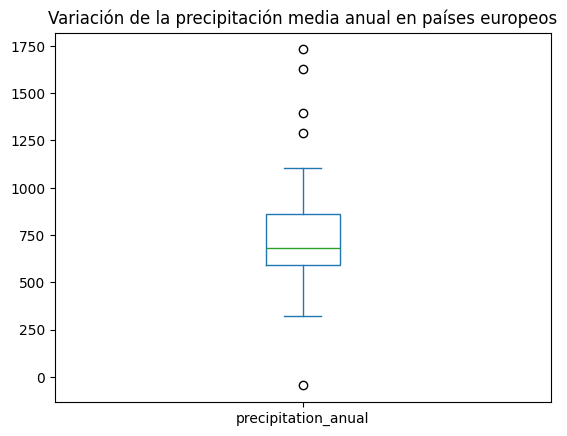

In [335]:
import matplotlib.pyplot as plt

DF['precipitation_anual'].plot(kind='box')
plt.title('Variación de la precipitación media anual en países europeos')
plt.show()

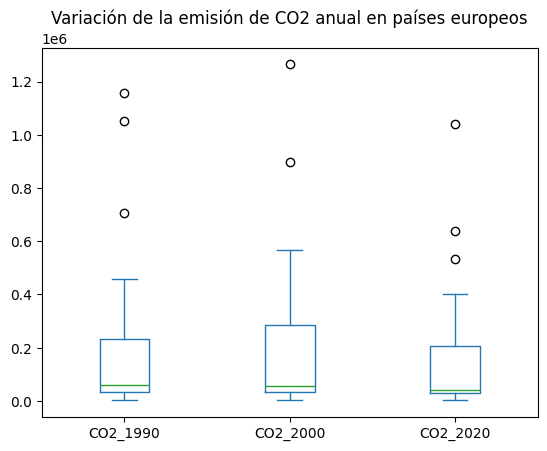

In [336]:
DF[['CO2_1990','CO2_2000','CO2_2020']].plot(kind='box')
plt.title('Variación de la emisión de CO2 anual en países europeos')
plt.show()

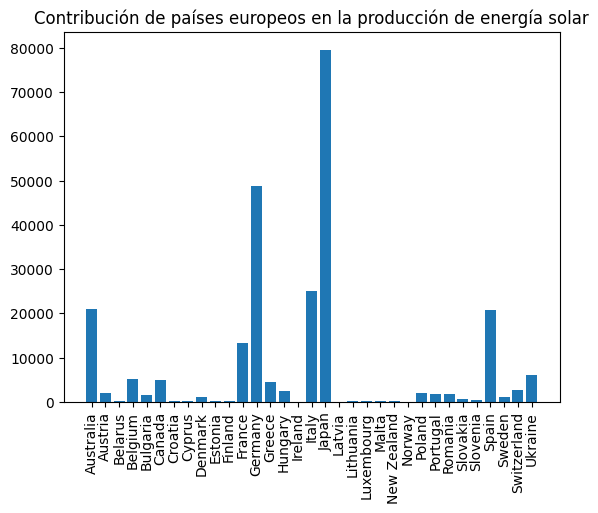

In [338]:
plt.bar(DF['Country'], DF['solar_energy_anual'])
plt.xticks(rotation=90)
plt.title('Contribución de países europeos en la producción de energía solar')
plt.show()

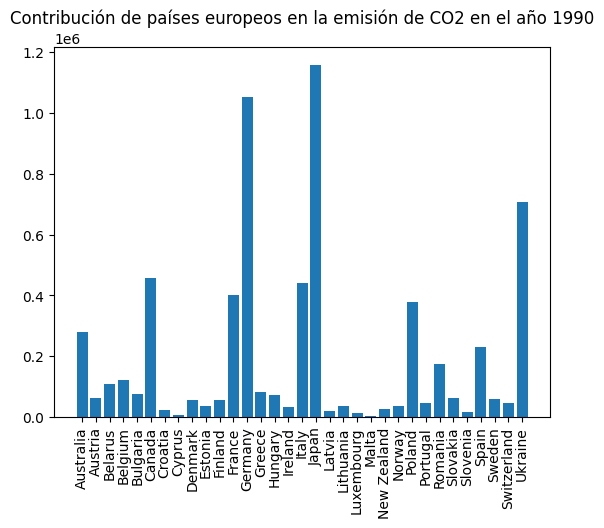

In [339]:
plt.bar(DF['Country'], DF['CO2_1990'])
plt.xticks(rotation=90)
plt.title('Contribución de países europeos en la emisión de CO2 en el año 1990')
plt.show()